# Trabalhando com série Temporais 
Exemplo: Vazões do Rio Sapucaí


Bibliotecas
Mais informações: http://scikit-learn.org

In [498]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

Leitura do arquivo com dados da vazão e data:

In [500]:
df_treinamento = pd.read_csv(r"C:\Users\Damata\OneDrive\IA - Mestrado\Aula3\Vazoes\Sapucai.txt", names = ['day', 'month', 'year', 'VAZAO'], index_col=False,delimiter='\t',skiprows=0,nrows=100)
# Cria um novo campo com a data
# É obrigatório o uso dos nomes dos campos 'year', 'month', 'day' 
df_treinamento['DATA']= pd.to_datetime(df_treinamento[['year', 'month', 'day']])
df_treinamento.head()

,day,month,year,VAZAO,DATA
0,1,7,2008,15.72,2008-07-01
1,2,7,2008,15.55,2008-07-02
2,3,7,2008,15.55,2008-07-03
3,4,7,2008,15.38,2008-07-04
4,5,7,2008,15.21,2008-07-05


Visualização dos dados das vazões no período:

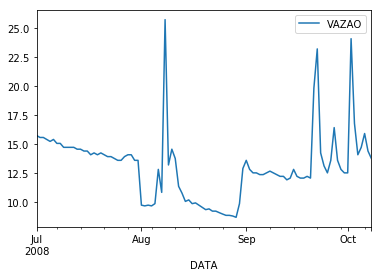

In [501]:
sapucai_data= df_treinamento[['DATA','year', 'month', 'day','VAZAO']]
sapucai_data = sapucai_data.set_index('DATA')
sapucai_data.plot(y='VAZAO')
plt.show()

Visualização dos dados das vazões e média móvel no período:

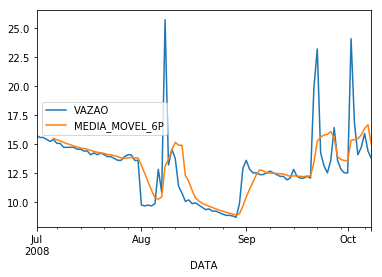

In [502]:
sapucai_data['MEDIA_MOVEL_6P'] = sapucai_data['VAZAO'].rolling(window=6).mean()
sapucai_data.plot(y=['VAZAO', 'MEDIA_MOVEL_6P'])
plt.show()

Eliminando outliers:

Neste exemplo, os valores fora da faixa definida foram alterados para a média móvel.

In [677]:
window=6
rolling_mean = sapucai_data['VAZAO'].rolling(window).mean()
mae = mean_absolute_error(sapucai_data['VAZAO'][window:], rolling_mean[window:])#mean absolute error is a measure of difference between two continuous variables. 
print("mean absolute error: " +  "\n"  + str(mae))

deviation = 1*np.std(sapucai_data['VAZAO'][window:] - rolling_mean[window:])
print("deviation: " +  "\n"  + str(deviation))

lower_bound = rolling_mean - (mae + 2 * deviation)
upper_bound = rolling_mean + (mae + 2 * deviation)

sapucai_data['VAZAO'][sapucai_data['VAZAO']<lower_bound]=rolling_mean
sapucai_data['VAZAO'][sapucai_data['VAZAO']>upper_bound]=rolling_mean

mean absolute error: 
0.732997044917
deviation: 
1.1195720982027069


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


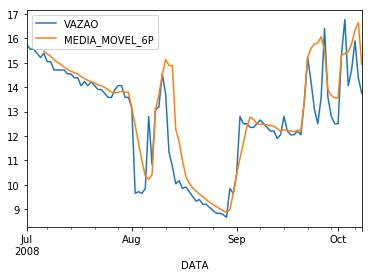

In [679]:
sapucai_data.plot(y=['VAZAO', 'MEDIA_MOVEL_6P'])
plt.show()

Eliminando valores nulos:

In [674]:
df_treinamento=sapucai_data[['day','month','year','MEDIA_MOVEL_6P','VAZAO']]
df_treinamento['MEDIA_MOVEL_6P'][df_treinamento['MEDIA_MOVEL_6P'].isnull()]=df_treinamento['VAZAO']
df_treinamento

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,day,month,year,MEDIA_MOVEL_6P,VAZAO
DATA,,,,,
2008-07-01,1,7,2008,15.720000,15.720000
2008-07-02,2,7,2008,15.550000,15.550000
2008-07-03,3,7,2008,15.550000,15.550000
2008-07-04,4,7,2008,15.380000,15.380000
2008-07-05,5,7,2008,15.210000,15.210000
2008-07-06,6,7,2008,15.465000,15.380000
2008-07-07,7,7,2008,15.351667,15.040000
2008-07-08,8,7,2008,15.266667,15.040000
2008-07-09,9,7,2008,15.125000,14.700000


In [675]:
X=df_treinamento.drop(['VAZAO'], axis=1)
y=df_treinamento[['VAZAO']]

Normalizando os dados:

In [676]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(y)
y = scaler.transform(y)

In [654]:
X

array([[ 0.        ,  0.        ,  0.        ,  0.88154907],
       [ 0.03333333,  0.        ,  0.        ,  0.85970098],
       [ 0.06666667,  0.        ,  0.        ,  0.85970098],
       [ 0.1       ,  0.        ,  0.        ,  0.83785289],
       [ 0.13333333,  0.        ,  0.        ,  0.8160048 ],
       [ 0.16666667,  0.        ,  0.        ,  0.84877694],
       [ 0.2       ,  0.        ,  0.        ,  0.83421154],
       [ 0.23333333,  0.        ,  0.        ,  0.8232875 ],
       [ 0.26666667,  0.        ,  0.        ,  0.80508075],
       [ 0.3       ,  0.        ,  0.        ,  0.79051536],
       [ 0.33333333,  0.        ,  0.        ,  0.77959131],
       [ 0.36666667,  0.        ,  0.        ,  0.76502592],
       [ 0.4       ,  0.        ,  0.        ,  0.75431607],
       [ 0.43333333,  0.        ,  0.        ,  0.74360622],
       [ 0.46666667,  0.        ,  0.        ,  0.73675192],
       [ 0.5       ,  0.        ,  0.        ,  0.72989761],
       [ 0.53333333,  0.

In [655]:
y

array([[ 0.87143034],
       [ 0.85041414],
       [ 0.85041414],
       [ 0.82939795],
       [ 0.80838175],
       [ 0.82939795],
       [ 0.78736556],
       [ 0.78736556],
       [ 0.74533317],
       [ 0.74533317],
       [ 0.74533317],
       [ 0.74533317],
       [ 0.72555322],
       [ 0.72555322],
       [ 0.70577327],
       [ 0.70577327],
       [ 0.66621338],
       [ 0.68599332],
       [ 0.66621338],
       [ 0.68599332],
       [ 0.66621338],
       [ 0.64643343],
       [ 0.64643343],
       [ 0.62665348],
       [ 0.60687353],
       [ 0.60687353],
       [ 0.64643343],
       [ 0.66621338],
       [ 0.66621338],
       [ 0.60687353],
       [ 0.60687353],
       [ 0.12962047],
       [ 0.12164668],
       [ 0.12962047],
       [ 0.12164668],
       [ 0.14556806],
       [ 0.51044629],
       [ 0.26566943],
       [ 0.54635925],
       [ 0.55742366],
       [ 0.72555322],
       [ 0.62665348],
       [ 0.32995426],
       [ 0.25763382],
       [ 0.16948943],
       [ 0

Dividindo os dados para treinamento e teste:

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [657]:

X_train.shape


(80, 4)

In [ ]:
Criação da rede neural MLPRegressor e treinamento:

In [658]:
from sklearn.neural_network import MLPRegressor

epochs   = 15000   # Maximo numero de iteracoes
lr       = 0.01   # Taxa de aprendizado
goal     = 0.01   # Criterio de minimo erro de treinamento
'''
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
'''
activation='tanh'

mlp = MLPRegressor(hidden_layer_sizes=(10),activation=activation,learning_rate_init =lr,max_iter=epochs, verbose=False)
mlp.fit(X_train,y_train.ravel())

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Validação do treinamento com os dados de teste:

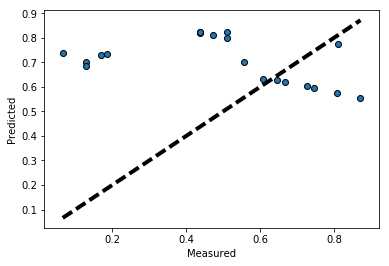

0.133226688692


In [659]:
predicted = mlp.predict(X_test)


fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(metrics.mean_squared_error(y_test.ravel(), predicted))

# Transformação dos dados

O dataset de dados foi alterado para ter os 6 valores iniciais da série temporal. Sendo o y7 o campos utilizado para predição.

In [660]:
df_treinamento1=df_treinamento
df_treinamento1= df_treinamento1.reset_index()
x_6series=pd.DataFrame( columns= ['id','x1','x2','x3','x4','x5','x6','y7'])
for index, row in df_treinamento1.iterrows():    
    #df_treinamento.loc[index,'slice_id']=n
    #print(index)
    dfi_slice = df_treinamento1['VAZAO'].loc[[index-6,index-5,index-4,index-3,index-2,index-1,index]]
    dfi_slice = pd.DataFrame(dfi_slice).transpose()
    dfi_slice= dfi_slice.reset_index()
    dfi_slice.columns= ['id', 'x1','x2','x3','x4','x5','x6','y7']
    dfi_slice['id']=index
    x_6series=x_6series.append(dfi_slice, ignore_index=True)
    #print(dfi_slice)
#x_6series
df_treinamento1
df_treinamento1=df_treinamento1.join(x_6series)


In [661]:
df_treinamento1

,DATA,day,month,year,MEDIA_MOVEL_6P,VAZAO,id,x1,x2,x3,x4,x5,x6,y7
0,2008-07-01,1,7,2008,15.720000,15.720000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.720000
1,2008-07-02,2,7,2008,15.550000,15.550000,1.0,NaN,NaN,NaN,NaN,NaN,15.720000,15.550000
2,2008-07-03,3,7,2008,15.550000,15.550000,2.0,NaN,NaN,NaN,NaN,15.720000,15.550000,15.550000
3,2008-07-04,4,7,2008,15.380000,15.380000,3.0,NaN,NaN,NaN,15.720000,15.550000,15.550000,15.380000
4,2008-07-05,5,7,2008,15.210000,15.210000,4.0,NaN,NaN,15.720000,15.550000,15.550000,15.380000,15.210000
5,2008-07-06,6,7,2008,15.465000,15.380000,5.0,NaN,15.720000,15.550000,15.550000,15.380000,15.210000,15.380000
6,2008-07-07,7,7,2008,15.351667,15.040000,6.0,15.720000,15.550000,15.550000,15.380000,15.210000,15.380000,15.040000
7,2008-07-08,8,7,2008,15.266667,15.040000,7.0,15.550000,15.550000,15.380000,15.210000,15.380000,15.040000,15.040000
8,2008-07-09,9,7,2008,15.125000,14.700000,8.0,15.550000,15.380000,15.210000,15.380000,15.040000,15.040000,14.700000
9,2008-07-10,10,7,2008,15.011667,14.700000,9.0,15.380000,15.210000,15.380000,15.040000,15.040000,14.700000,14.700000


Substiruindo os valores nulos pela média móvel de 6 períodos

In [662]:
df_treinamento1['x1'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)
df_treinamento1['x2'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)
df_treinamento1['x3'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)
df_treinamento1['x4'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)
df_treinamento1['x5'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)
df_treinamento1['x6'].fillna(df_treinamento1['MEDIA_MOVEL_6P'], inplace=True)

In [663]:
X=df_treinamento1[['day','month','year','MEDIA_MOVEL_6P']]
y=df_treinamento1[['y7']]

In [664]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(y)
y = scaler.transform(y)

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# MLPRegressor

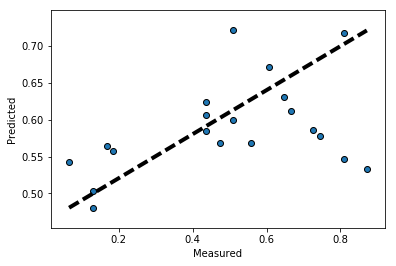

0.0588842001006


In [694]:
#predicted = cross_val_predict(mlp, X_test, y_test.ravel(), cv=2)
mlp = MLPRegressor(hidden_layer_sizes=(100),activation=activation,learning_rate_init =lr,max_iter=epochs, verbose=False)
mlp.fit(X_train,y_train.ravel())
predicted = mlp.predict(X_test)

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(metrics.mean_squared_error(y_test.ravel(), predicted))

Utilizando o técnica de GridSearchCV para derterminar os melhores parâmetros da rede

In [685]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': [(10),(50),(100)], 
                     'max_iter': [500,1000,1500],
                     'learning_rate_init': [0.001, 0.01, 0.1],
                     'activation': ['relu','logistic', 'tanh']
                    }]

scores = ['neg_mean_squared_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(mlp, tuned_parameters, cv=2,scoring=score)
    clf.fit(X, y.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    y_true, y_pred = y_test, clf.predict(X_test)
    print(metrics.mean_squared_error(y_true, y_pred))
    print()

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate_init': 0.001, 'max_iter': 500}

Grid scores on development set:

-0.144 (+/-0.245) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'max_iter': 500}
-0.119 (+/-0.126) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'max_iter': 1000}
-0.051 (+/-0.017) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'max_iter': 1500}
-0.056 (+/-0.045) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.01, 'max_iter': 500}
-0.089 (+/-0.025) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.01, 'max_iter': 1000}
-0.136 (+/-0.150) for {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.01, 'max_iter': 1500}
-0.324 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': 

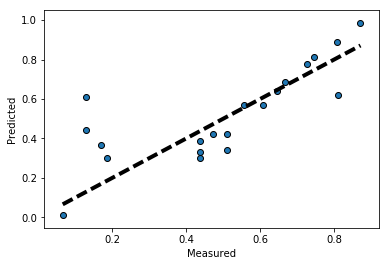

0.0260254114528


In [697]:
mlp = MLPRegressor(hidden_layer_sizes=(50),activation='relu',learning_rate_init =0.01,max_iter=500, verbose=False)
mlp.fit(X_train,y_train.ravel())
predicted = mlp.predict(X_test)

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(metrics.mean_squared_error(y_test.ravel(), predicted))

#classification_report(y_test.ravel(), predicted))
